In [185]:
#libraries
import pandas as pd
import warnings
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.functions import *
sns.set(rc={'figure.figsize':(10,8), 'font.size': 1.3})

In [186]:
#DataFrames
warnings.filterwarnings("ignore")
df_dataset = pd.read_csv('datasets/SetRegexFin.csv')
df_comorb = pd.read_csv('datasets/regex_comorb.csv')
df_antfam = pd.read_csv('datasets/regex_antfam.csv')
df_diag = pd.read_csv('datasets/regex_diag.csv')
df_catescolar = pd.read_csv('datasets/CatEscolaridad.csv')
df_catedociv = pd.read_csv('datasets/CatEstadoCivil.csv')
df_catlgbt = pd.read_csv('datasets/CatLgbt.csv')
df_catocup = pd.read_csv('datasets/CatOcupacion.csv')

In [187]:
def gen_list(df):
    listexc = []
    list = ['FolioId','Migracion', 'Edad', 'Sexo', 'EstadoCivil', 'Escolaridad' , 'Ocupacion']
    for col in df.columns:
        if col not in list:
            listexc.append(col)
    return listexc
    

In [188]:
def get_psm(df_dataset, listinclude):
    psm = PsmPy(df_dataset, treatment= 'Migracion', indx= 'FolioId', exclude = listinclude)
    psm.logistic_ps()
    return psm

In [189]:
def dict_data (df_catescolar, df_catedociv, df_catlgbt, df_catocup):
    dict_escolar = dict(zip(df_catescolar['Descripcion'], df_catescolar['ComunId']))
    dict_edociv = dict(zip(df_catedociv['Descripcion'], df_catedociv['ComunId']))
    dict_lgbt = dict(zip(df_catlgbt['Descripcion'], df_catlgbt['ComunId']))
    dict_ocup = dict(zip(df_catocup['Descripcion'], df_catocup['ComunId']))
    return dict_escolar, dict_edociv, dict_lgbt, dict_ocup

In [190]:
def mod_data (df ,dict_escolar, dict_edociv, dict_lgbt, dict_ocup):
    df['Escolaridad'] = df['Escolaridad'].map(dict_escolar)
    df['EstadoCivil'] = df['EstadoCivil'].map(dict_edociv)
    df['LGBTTTI'] = df['LGBTTTI'].map(dict_lgbt)
    df['Ocupacion'] = df['Ocupacion'].map(dict_ocup)
    return df
    

In [191]:
def mod_df (df):
    df.drop(columns=['Motivo10', 'Diag_TRS_Eje1ComunNomenclatura_9', 'Diag_TRS_Eje1Previo-Subsecuente_9', 'Diag_TRS_Eje1CodigoCompuesto_9', 'Diag_TRS_Eje1Codigo_9', 'Diag_TRS_Eje1Descripcion_9', 'Diag_TRS_Eje1ComunNomenclatura_10', 'Diag_TRS_Eje1Previo-Subsecuente_10', 'Diag_TRS_Eje1CodigoCompuesto_10', 'Diag_TRS_Eje1Codigo_10', 'Diag_TRS_Eje1Descripcion_10'] , axis=1, inplace=True)
    return df

In [192]:
def graf_psm(psm):
    psmdata = psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None, drop_unmatched=True)
    psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel='Propensity logit', names = ['Migracion', 'No Migracion'], colors = ['blue', 'red'], save=True)

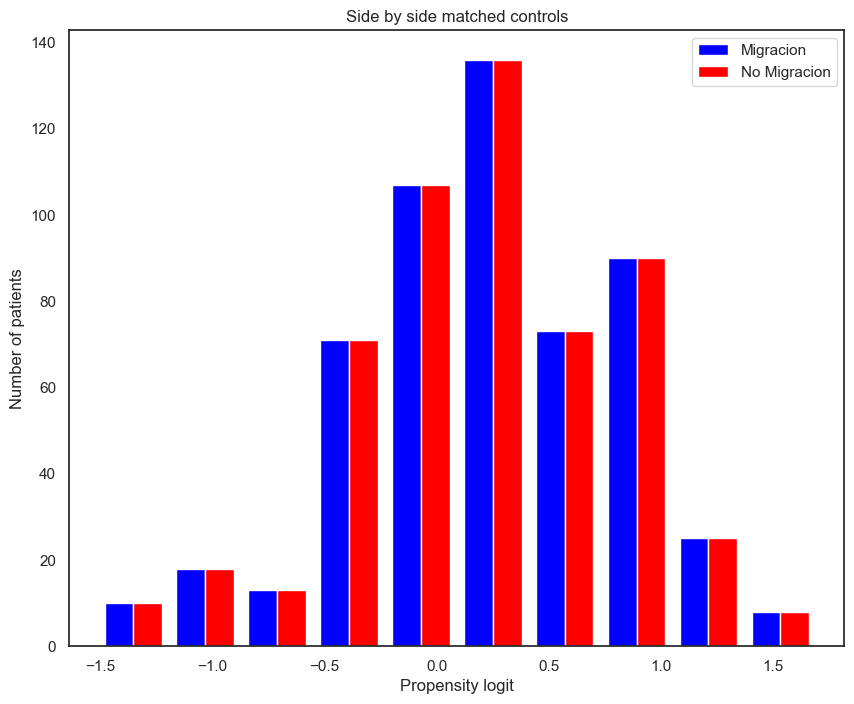

In [193]:
dict_escolar, dict_edociv, dict_lgbt, dict_ocup = dict_data(df_catescolar, df_catedociv, df_catlgbt, df_catocup)
df = mod_df(df_dataset)
listexclude = gen_list(df_dataset)
df = mod_data(df_dataset, dict_escolar, dict_edociv, dict_lgbt, dict_ocup)
psm = get_psm(df, listexclude)
graf_psm(psm)

In [196]:
psm.df_matched

,FolioId,Sexo,Edad,EstadoCivil,Escolaridad,Ocupacion,propensity_score,propensity_logit,Migracion,matched_ID
0,304773,1.0,24.0,1,10,1,0.536830,0.147588,1,311645.0
1,304816,1.0,33.0,3,11,8,0.788124,1.313653,1,336273.0
2,304873,1.0,32.0,1,6,5,0.567864,0.273142,1,366211.0
3,304911,1.0,28.0,1,8,5,0.629171,0.528662,1,396775.0
4,304993,1.0,31.0,3,6,5,0.536182,0.144983,1,355148.0
...,...,...,...,...,...,...,...,...,...,...
1097,327657,2.0,66.0,2,9,4,0.536833,0.147598,0,NaN
1098,304787,1.0,24.0,1,5,4,0.419442,-0.325064,0,NaN
1099,336786,1.0,38.0,3,10,5,0.736343,1.027049,0,NaN
1100,345454,2.0,37.0,1,11,4,0.580549,0.325026,0,NaN
